<a href="https://colab.research.google.com/github/BelanVaidehee/BMLpracticals/blob/main/Experiment7bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (1).csv to heart (1).csv


In [ ]:
import io
filename = list(uploaded.keys())[0]
print("Using file:", filename)

df = pd.read_csv(io.BytesIO(uploaded[filename]))


Using file: heart (1).csv


In [ ]:
print("First 5 rows:")
print(df.head())

print("\nShape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nMissing values:")
print(df.isnull().sum())


First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Shape of dataset: (1025, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
targe

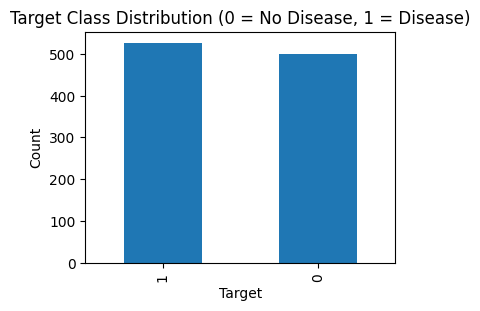

In [ ]:
plt.figure(figsize=(4,3))
df['target'].value_counts().plot(kind='bar')
plt.title('Target Class Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])



Feature matrix shape: (1025, 13)
Target vector shape: (1025,)

Training samples: 820
Test samples: 205


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    acc_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc_k)

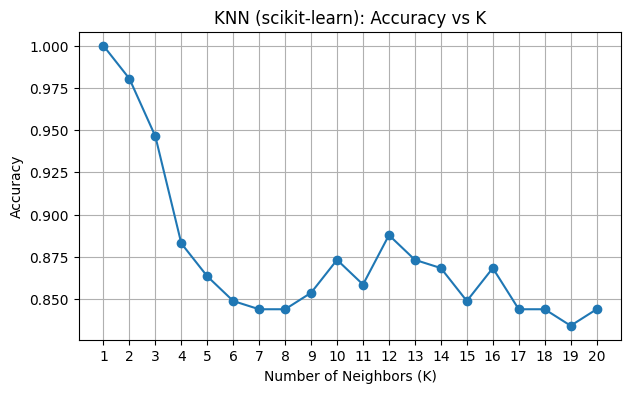

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(k_values, accuracies, marker='o')
plt.xticks(k_values)
plt.title('KNN (scikit-learn): Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
best_k = k_values[int(np.argmax(accuracies))]
print("\nBest K based on test accuracy:", best_k)

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_sklearn = knn_best.predict(X_test_scaled)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)

print("\n=== scikit-learn KNN (k = {}) ===".format(best_k))
print("Accuracy: {:.2f}%".format(acc_sklearn * 100))
print("\nConfusion Matrix:\n", cm_sklearn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_sklearn))



Best K based on test accuracy: 1

=== scikit-learn KNN (k = 1) ===
Accuracy: 100.00%

Confusion Matrix:
 [[100   0]
 [  0 105]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



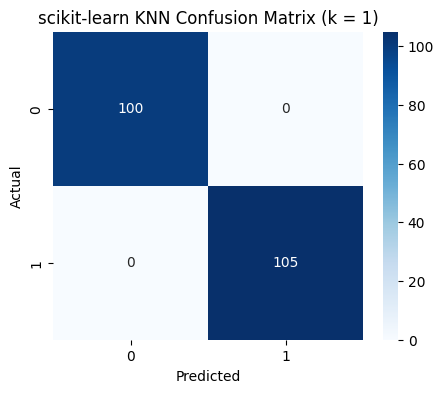

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues')
plt.title('scikit-learn KNN Confusion Matrix (k = {})'.format(best_k))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
def euclidean_distance(x1, x2):
    """Compute Euclidean distance between two 1-D arrays."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_one_knn(X_train, y_train, x_test_instance, k):

    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test_instance)
        distances.append((dist, y_train.iloc[i]))

        distances.sort(key=lambda x: x[0])

    # Take the top-k neighbors
    k_neighbors = distances[:k]

    # Majority voting
    neighbor_labels = [label for _, label in k_neighbors]
    # Return the most frequent class
    return max(set(neighbor_labels), key=neighbor_labels.count)

def predict_knn(X_train, y_train, X_test, k):
    """
    Predict labels for all test instances using KNN.
    """
    predictions = []
    for i in range(len(X_test)):
        pred_label = predict_one_knn(X_train, y_train, X_test[i], k)
        predictions.append(pred_label)
    return np.array(predictions)


In [ ]:
print("\nRunning manual KNN with k = {} ...".format(best_k))

y_pred_manual = predict_knn(X_train_scaled, y_train, X_test_scaled, best_k)

acc_manual = accuracy_score(y_test, y_pred_manual)
cm_manual = confusion_matrix(y_test, y_pred_manual)

print("\n=== Manual KNN (k = {}) ===".format(best_k))
print("Accuracy: {:.2f}%".format(acc_manual * 100))
print("\nConfusion Matrix:\n", cm_manual)
print("\nClassification Report:\n", classification_report(y_test, y_pred_manual))


Running manual KNN with k = 1 ...

=== Manual KNN (k = 1) ===
Accuracy: 100.00%

Confusion Matrix:
 [[100   0]
 [  0 105]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



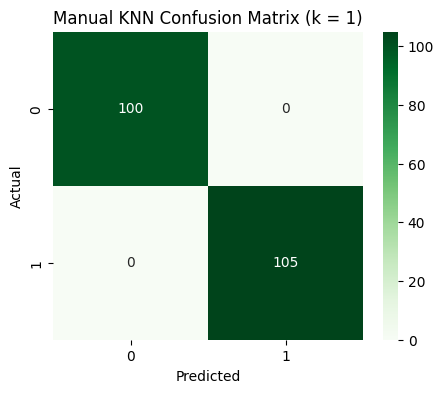

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Greens')
plt.title('Manual KNN Confusion Matrix (k = {})'.format(best_k))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
print("\nNumber of different predictions (sklearn vs manual):",
      np.sum(y_pred_sklearn != y_pred_manual))


Number of different predictions (sklearn vs manual): 0
